<u><b>Business Understanding</b></u>  
  
Financial institutions lose billions of dollars each year because of credit card fraud. As the number of credit card transaction increase each year, the rick of fradulant transaction increseas as well. In order to tackle this problem, financial institutes must work on detecting fradulent transaction as early as possible to decrease their losses and maintain their customers safety and trust.

The goal of this project is to develop a model that can detect fradulant transaction based on past data. The requirment for the model are:
<ul>
<li> Identiy the fradulant transaction with high accuracy </li>
<li> Decrease the probabily of flase positive of fradulant transaction </li>
<li> The model should be fast and scalable that can process large data and detect fradulant transaction close to real-time. </li>
</ul>


<u><b>Data Understanding </b></u>  
  

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.  
  
It contains only numerical input variables which are the result of a PCA (Princial Component Analysis) transformation. By using PCA, the correlated features in the original data are comdined and new features are created labeled: 
<li>V1</li>
<li>V2</li>
<li>till V28</li>  

which simplyfies the data set and adds privacy to the data. In addition to the PCA transformet feature, it includes Time, Amount and Class feater. Class is our target variable, 0 indicating legimate and 1 indicating fradulant transaction.


In [ ]:
# Feature of the data set
import pandas as pd

df = pd.read_csv('../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


To understand the varibale and its relation ship, We will check for the correlation matrix and visualize it. We will use heatmap to dispaly and visualise it. 

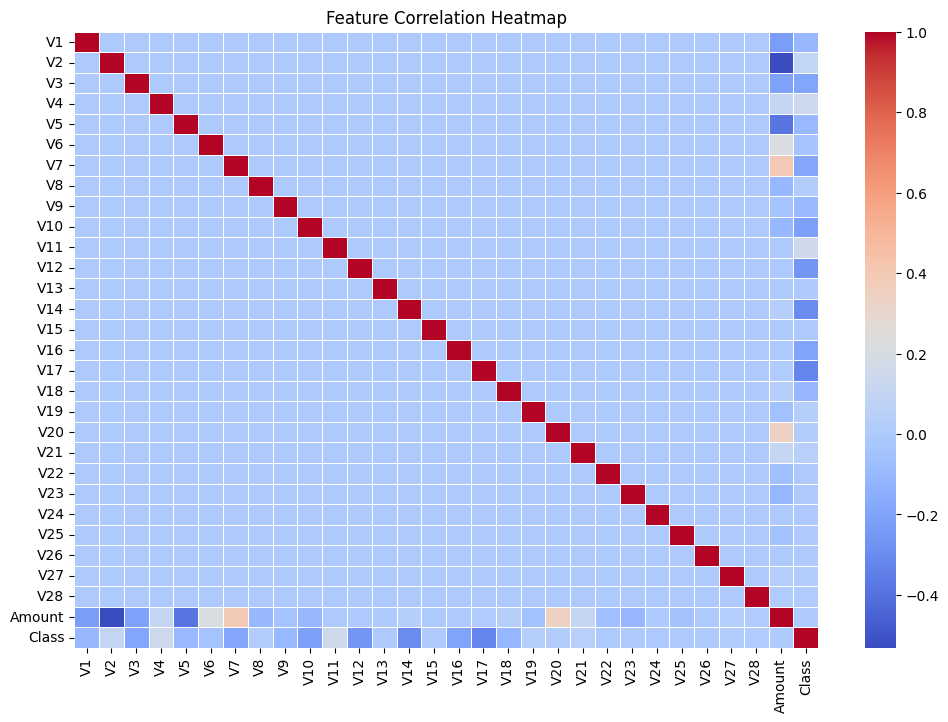

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


Looking at the heatmap we can see that the features have small to no linear correlation between them. 

<u><b>Data Preparationb</b></u>  
  
To prepare the data set for effective modeling, we will first check if the data has any missing values. If the data contains missing values and the feature are importatnt and strongly influece the target variable, we will impute the missing value with the median value of the respective feature.  
Next we will check for class imbalance. If the feature or traget variable has class imbalance it can lead to misleading accuracy. Lastly, since the PCA transformet features are already numerical and standardized, we need to standarize the remaning features to ensure that all the features contribute equally to the model. 

In [9]:
# Check for missing vlaues
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Since we do not have  missing value in the features, we can proceed to next step of data preparation, handeling class imbalance. Since most of our feature are numerical values, we only need to check for class imbalance in our traget varaible.

In [ ]:
# checking for class imbalance
print(df['Class'].value_counts(normalize=True) * 100)

0    99.827251
1     0.172749
Name: Class, dtype: float64


The traget variable is havily imbalanced. To address class imbalance we can use resampling method, which includes oversampling the minorty class using SMOTE or alternatively, use models that can handel class imbalance during training.  
The class imbalance will be handeled according the model that will be used later.  
  
Next step is the standardize the features. It transfrome the features to have mean 0 and standard deviation to 1, which ensure the features are are in a same scale and they help models perform better. 

In [17]:
print(df.describe().T[['mean', 'std', 'min', 'max']])

                mean       std         min         max
V1      1.168375e-15  1.958696  -56.407510    2.454930
V2      3.416908e-16  1.651309  -72.715728   22.057729
V3     -1.379537e-15  1.516255  -48.325589    9.382558
V4      2.074095e-15  1.415869   -5.683171   16.875344
V5      9.604066e-16  1.380247 -113.743307   34.801666
V6      1.487313e-15  1.332271  -26.160506   73.301626
V7     -5.556467e-16  1.237094  -43.557242  120.589494
V8      1.213481e-16  1.194353  -73.216718   20.007208
V9     -2.406331e-15  1.098632  -13.434066   15.594995
V10     2.239053e-15  1.088850  -24.588262   23.745136
V11     1.673327e-15  1.020713   -4.797473   12.018913
V12    -1.247012e-15  0.999201  -18.683715    7.848392
V13     8.190001e-16  0.995274   -5.791881    7.126883
V14     1.207294e-15  0.958596  -19.214325   10.526766
V15     4.887456e-15  0.915316   -4.498945    8.877742
V16     1.437716e-15  0.876253  -14.129855   17.315112
V17    -3.772171e-16  0.849337  -25.162799    9.253526
V18     9.

The PCA features are already standarized, only Time, Amount are not standarize. Since time is the number of seconds elapsed between this transaction and the first transaction in the dataset, we will be droping the feature. So, the only remaining feature to standarize is the Aoumnt feature. 

In [15]:
# Droping the time cloumn
df = df.drop(columns=['Time'])

In [18]:
# Standarizing the Aoumnt folumn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

print(df.describe().T[['mean', 'std', 'min', 'max']])

                mean       std         min         max
V1      1.168375e-15  1.958696  -56.407510    2.454930
V2      3.416908e-16  1.651309  -72.715728   22.057729
V3     -1.379537e-15  1.516255  -48.325589    9.382558
V4      2.074095e-15  1.415869   -5.683171   16.875344
V5      9.604066e-16  1.380247 -113.743307   34.801666
V6      1.487313e-15  1.332271  -26.160506   73.301626
V7     -5.556467e-16  1.237094  -43.557242  120.589494
V8      1.213481e-16  1.194353  -73.216718   20.007208
V9     -2.406331e-15  1.098632  -13.434066   15.594995
V10     2.239053e-15  1.088850  -24.588262   23.745136
V11     1.673327e-15  1.020713   -4.797473   12.018913
V12    -1.247012e-15  0.999201  -18.683715    7.848392
V13     8.190001e-16  0.995274   -5.791881    7.126883
V14     1.207294e-15  0.958596  -19.214325   10.526766
V15     4.887456e-15  0.915316   -4.498945    8.877742
V16     1.437716e-15  0.876253  -14.129855   17.315112
V17    -3.772171e-16  0.849337  -25.162799    9.253526
V18     9.

<u><b>Modeling</b></u>  
  
We will be experiment with various model for this data set to identify the best approach to tackle this problem. After evaluating all the models performance using appropriate metric, the model that performs the best will be our final model. 


We will use <b>Logistic regression</b> as our baseline model. 

In [ ]:
# Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, C=0.01, solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on test set
y_pred = log_reg.predict(X_test)


# Evaluate model performance
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



The logistic regression model was able to detect non fradulant transaction  really well, but the model struggled while detecting fradualant transaction with the precision of only 6%, which mean that 94% were false positive. However, the recall for the fradualant transaction is 88%, which means 88% of fraud was caught.   

Our next model is <b>XGBoost</b>.

In [29]:
# Import libraries
from xgboost import XGBClassifier

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1)

# Calculate class imbalance ratio to help the model handle imbalanced data.
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Initialize the XGBoost model
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  
    objective='binary:logistic',
    eval_metric='aucpr',              
    n_estimators=400,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
model.fit(x_train, y_train)

# Make predictions on test set
y_pred = model.predict(x_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.87      0.89        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



The XGBoost model precission and recall for non fradulant transaction are 100%. For the fradulant transaction, the model showed good reasuls of 90% precisioon and 87% recall. Overall the model achieved good reasult on classifing in this data set. 

Our next model .....

<u><b>Evulation</b></u>  

Need to write the evulation after all the model are added

<u><b>Deployment</b></u>  
  
After builing the Machine learning model, we can deploy the model using the following steps.
<li><b>Train and save the model</b>: After training the model, we need to save the model as a file, eg: .pkl, .joblib. These files help save the model with all the learned parametere, so we can load and use it exactly as it was</li>
<li><b>Stroe the model on the server</b>: Store the file in the server from where we will run our API. The API will load the file from the server when it receives a request.
<li><b>Create an API</b>: Develop an API the take in input, loads the model, runs the prediction and retuns the result.  
    
      

<b>Another Method is to Dockerze the model</b>
<li><b>Contanerize the API</b>: Using Docker we need to contianer the API, model and dependencies into a single docker. This ensures or model runs consitently accross diffent enviroment.
<li><b>Share the Docker image</b>: Uload the image to Docker hub for easier distribution or deploy it to a cloud, eg: AWS, Azure.


<b>Resource</b>: https://machinelearningmastery.com/a-practical-guide-to-deploying-machine-learning-models/
